In [23]:
from cycle_gan import CycleGAN

import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

from utils import load_model, load_yaml

In [24]:
# Set the configuration
config = load_yaml("/home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/config/cycle_gan_config.yml")

# Training setting
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(config['data']['seed'])
if device == 'cuda':
  torch.cuda.manual_seed_all(config['data']['seed'])

# Set the model
model = CycleGAN(gen_input_dim=config['model']['gen_input_dim'], gen_output_dim=config['model']['gen_output_dim'],
                 dis_input_dim=config['model']['dis_input_dim'], dis_conv_filters=config['model']['dis_conv_filters'],
                 dis_conv_kernels=config['model']['dis_conv_kernels'], dis_conv_strides=config['model']['dis_conv_strides'],
                 dis_conv_pads=config['model']['dis_conv_pads'], dis_norm=config['model']['dis_norm']).to(device)

model, _, _, _ = load_model('/home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/models/style_transfer/2023.08.01.14.32.51/style_transfer_last.pt', model)
print(model)

Load the yaml file from /home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/config/cycle_gan_config.yml
Loaded the model from /home/seungwon/Projects/deep-learning-projects/cv-09-cycle-generative-adversarial-network-pytorch/models/style_transfer/2023.08.01.14.32.51/style_transfer_last.pt successfully
CycleGAN(
  (Gxy): UNet(
    (sample_norm32): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm64): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm128): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (sample_norm256): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (enc_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (enc_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (enc_conv3): Conv2d(64, 128, k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


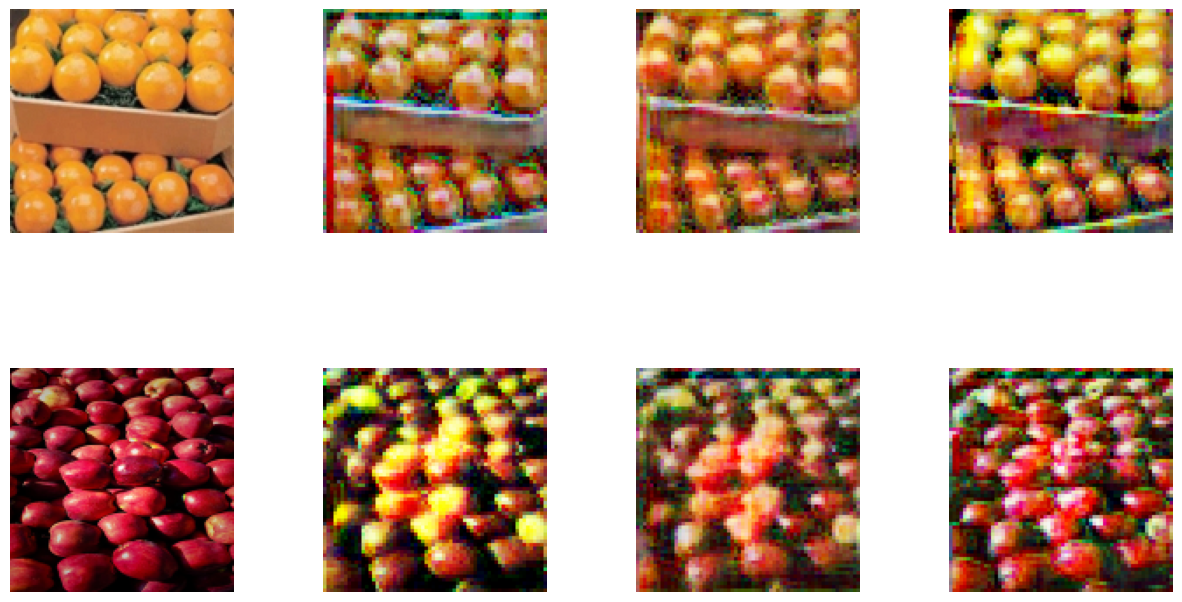

In [27]:
# Set the transform
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize(config['data']['img_size'])])
# Set the data
imgA = plt.imread('images/orange.jpg')
imgA = transform(imgA)
imgA = imgA.to(device)

imgB = plt.imread('images/apple.jpg')
imgB = transform(imgB)
imgB = imgB.to(device)

np.random.seed(777)
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
model.eval()

# Image A
sub = fig.add_subplot(2, 4, 1)
sub.axis('off')
sub.imshow(imgA.permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(2, 4, 2)
sub.axis('off')
img = model.Gxy(imgA.unsqueeze(dim=0))
sub.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(2, 4, 3)
sub.axis('off')
img = model.Gyx(model.Gxy(imgA.unsqueeze(dim=0)))
sub.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(2, 4, 4)
sub.axis('off')
img = model.Gyx(imgA.unsqueeze(dim=0))
sub.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())

# Image B
sub = fig.add_subplot(2, 4, 5)
sub.axis('off')
sub.imshow(imgB.permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(2, 4, 6)
sub.axis('off')
img = model.Gyx(imgB.unsqueeze(dim=0))
sub.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(2, 4, 7)
sub.axis('off')
img = model.Gxy(model.Gyx(imgB.unsqueeze(dim=0)))
sub.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())

sub = fig.add_subplot(2, 4, 8)
sub.axis('off')
img = model.Gxy(imgB.unsqueeze(dim=0))
sub.imshow(img.squeeze(0).permute(1, 2, 0).cpu().detach().numpy())
